# Color-scheme over lightness and saturation

In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
z_min, z_max = 1,10
levels = np.linspace(z_min,z_max,10)

## Monochromatic start colors

In [3]:
first_start_color = [1.,0.,0.,1.]
second_start_color = [0.,1.,0.,1.]
third_start_color = [0.,0.,1.,1.]

In [4]:
color_schemes.create_hsl_colorscheme(second_start_color, levels)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


[array([1., 1., 1., 1.]),
 array([1., 1., 1., 1.]),
 array([0.60493827, 0.77777778, 0.60493827, 1.        ]),
 array([0.44444444, 0.66666667, 0.44444444, 1.        ]),
 array([0.30864198, 0.55555556, 0.30864198, 1.        ]),
 array([0.19753086, 0.44444444, 0.19753086, 1.        ]),
 array([0.11111111, 0.33333333, 0.11111111, 1.        ]),
 array([0.04938272, 0.22222222, 0.04938272, 1.        ]),
 array([0.01234568, 0.11111111, 0.01234568, 1.        ]),
 array([0., 0., 0., 1.])]

In [5]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 200

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = ([mu_x_1,mu_y_1],[[mu_variance_x_1,0],[0,mu_variance_y_1]])
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = ([mu_x_2,mu_y_2],[[mu_variance_x_2,0.],[0.,mu_variance_y_2]])
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = ([mu_x_3,mu_y_3],[[mu_variance_x_3,0.],[0.,mu_variance_y_3]])

In [6]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)

In [7]:
Z_new, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.create_hsl_colorscheme,num_of_levels=10,startcolor=first_start_color, lvl_white = 1)

[0.04560516571255484, 0.13672040435537325, 0.22793829465420878, 0.31897855047484075, 0.40949420297676076, 0.5006554956481883, 0.5923979313361742, 0.682773815007732, 0.7730134082174278, 0.8641536933725498, 0.9548329559615578]


In [10]:
Z_new_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.create_hsl_colorscheme,num_of_levels=10,startcolor=second_start_color)


[0.045454467574319035, 0.13649754760600824, 0.22727074781054324, 0.3177454337505544, 0.4086023631279981, 0.5000623900042158, 0.5904688978729321, 0.6817080583514374, 0.7732939436174222, 0.8633257068417421, 0.9542487165507434]


In [11]:
Z_new_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.create_hsl_colorscheme,num_of_levels=10,startcolor=third_start_color)

[0.04564073663095724, 0.13675535199792177, 0.22718119012645244, 0.317554893507647, 0.40932685971308935, 0.5006451547820909, 0.5921755360931066, 0.6828130026330481, 0.7729265648409585, 0.8643941783741032, 0.9549116938902468]


In [12]:
mixed, alpha_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, Z_new, Z, Z_new_1, Z_1)

In [13]:
mixed, _ = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, mixed,alpha_new,Z_new_2,Z_2)

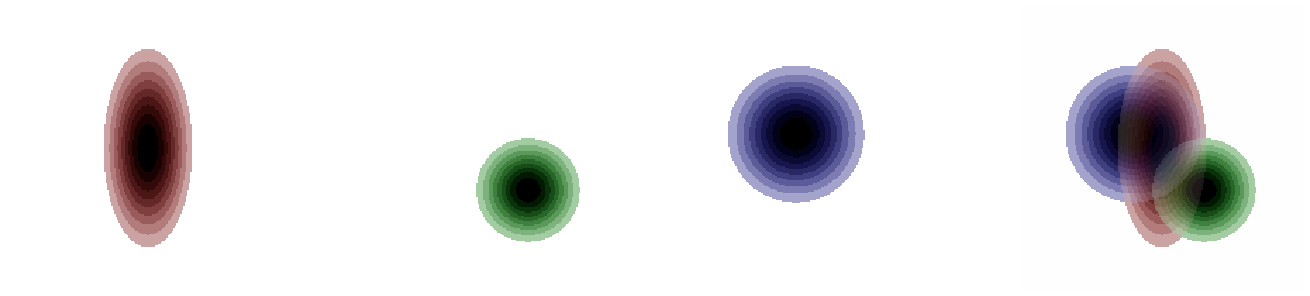

In [14]:
fig, (ax_0, ax_1, ax_2, ax_3) = plt.subplots(1,4)

# displays an image
ax_0.imshow(Z_new)
ax_0.axis("off")
ax_1.imshow(Z_new_1)
ax_1.axis("off")
ax_2.imshow(Z_new_2)
ax_2.axis("off")
ax_3.imshow(mixed)
ax_3.axis("off")
plt.subplots_adjust(bottom=0.0, left=0, right=3, top=3)
plt.show()